# Lineær regresjon - én variabel

Matematisk, kan vi beskrive datasettet vårt på følgende måte

$$
\begin{align*}
y_0&=\beta_0+\beta_1x_0+\epsilon_0\\
y_1&=\beta_0+\beta_1x_1+\epsilon_1\\
y_2&=\beta_0+\beta_1x_2+\epsilon_2\\
\dots & \dots \\
y_{n-1}&=\beta_0+\beta_1x_{n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

Når vi kun har én variabel får vi en matrise på formen

$$
\boldsymbol{X}=
\begin{bmatrix} 
1& x_{0} \\
1& x_{1} \\
1& x_{2} \\                      
\dots& \dots \\
1& x_{n-1} \\
\end{bmatrix}
$$

Med $n$ antall observasjoner

Målet vårt nå er å finne $\boldsymbol{\beta}$-ene våre 

$$
\boldsymbol{\beta} = [\beta_0, \beta_1]^T
$$

For å tilpasse oss "target" $\boldsymbol{y}$ 

$$
\boldsymbol{y} = [y_0,y_1, y_2,\dots, y_{n-1}]^T,
$$

Dette skrive på følgende måte

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}.
$$

Vår målfunksjon i denne sammenhengen vil være OLS(Ordinary Least Squares) og den kan beskrives på følgende måte

$$
\boldsymbol{\beta} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

In [1]:
%matplotlib inline 

# Importerer forskjellige pakker
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
class my_ols(): #implementation of Ordinary Least Squares (OLS) linear regression
    def __init__(self):
        self.beta = None
    
    def fit(self,x,y,size):
        X = np.c_[np.ones(size),x] #construct a design matrix X, consists of a column of ones (for the intercept) and the original feature x.
        self.beta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) #calculate the model coefficients (self.beta) using the OLS formula above
        print("Model successfully trained")
    
    def predict(self,x): #make predictions with the trained model. It takes a new value x as input and returns the predicted value y_hat
        y_hat = self.beta[0]+self.beta[1] * x #beta[0] is the intercept, and beta[1] is the coefficient for the input feature
        return y_hat    

In [10]:
def OLS(x,y,size):
    x_test=np.c_[np.ones(size),x]
    beta=np.linalg.inv(x_test.T.dot(x_test)).dot(x_test.T).dot(y)
    xnew = np.linspace(0,1,size)
    y_test=beta[0]+beta[1]*xnew
    return xnew, y_test

In [11]:
# Lager noen syntetiske data: common setup in machine learning to demonstrate linear regression, where you try to learn the relationship between x and y by fitting a linear model.
x = np.random.rand(250,1)      # 250 random numbers between 0 and 1
y = 4*x+np.random.randn(250,1) # This part generates an array of 250 random numbers sampled from a standard normal distribution (mean 0, standard deviation 1). This represents random noise in the data.

# : It is assumed that the residuals (also called errors) 


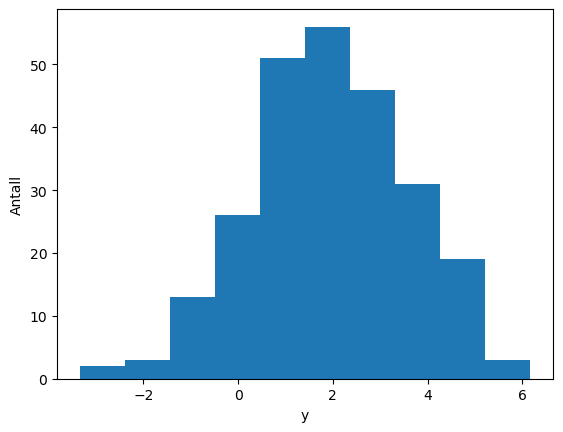

In [12]:
plt.hist(y) # Normaldistribuert 
plt.ylabel(r'Antall')
plt.xlabel(r'y')
plt.show()

In [13]:
model = my_ols() #lager en instance av class my_ols

In [14]:
model.fit(x,y,len(x)) #trener modell

Model successfully trained


Generer data for å tegne linjen som tilsvarer modellen vår

In [15]:
x_new = np.linspace(0,1,10) #lager 10 likt fordelte nummer mellom 0 og 1

In [16]:
y_hat_new_ols = model.predict(x_new) # lager nye predictions for y - y^

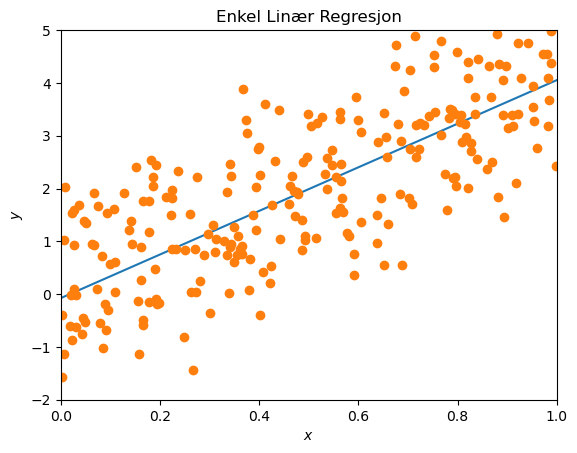

In [18]:
#x_ols, y_ols = OLS(x,y, len(x))

plt.plot(x_new, y_hat_new_ols, "C0-") #"C0-" is a format string that specifies how the line should be styled. C0 indicates the color (C0 is often associated with blue), and "-" indicates that the line should be solid.
plt.plot(x, y ,'C1o') #'C1o' is a format string that specifies how the points should be styled. C1 indicates the color (C1 is often associated with red), and "o" indicates that the points should be represented as circles.
plt.axis([0,1.0,0, 5.0]) #The x-axis limits are set from 0 to 1.0, and the y-axis limits are set from 0 to 5.0.
plt.xlabel(r'$x$') #This line sets the label for the x-axis, and it uses LaTeX-style formatting to display the x variable as "$x$" on the plot.
plt.ylabel(r'$y$')
plt.ylim(-2,5) # endrer til -2 for y
plt.title(r'Enkel Linær Regresjon')
plt.show()

In [19]:
# Diana - lagt inn eks:  Create an instance of the my_ols class
model = my_ols()

# Sample training data
x_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([2, 4, 5, 4, 5])

# Train the model
model.fit(x_train, y_train, len(x_train))

# Make predictions
x_new = 6
y_pred = model.predict(x_new)
print("Predicted value:", y_pred)

Model successfully trained
Predicted value: 5.800000000000008


Det samme ved bruk av SciKit-Learn

In [24]:
linreg = LinearRegression()
linreg.fit(x,y)
#y_hat_new_sk = linreg.predict(x_new)
#y_hat_new_sk = linreg.predict(np.expand_dims(x_new,1))
y_hat_new_sk = linreg.predict(x_new.reshape(-1, 1))

plt.plot(x_new, y_hat_new_sk, "C0-")
plt.plot(x, y ,'C1o')
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim(-2,5)
plt.title(r'Enkel Linær Regresjon')
plt.show()

AttributeError: 'int' object has no attribute 'reshape'

In [26]:
print("beta_0 = ", linreg.intercept_[0])
print("beta_1 = ", linreg.coef_[0][0])

beta_0 =  -0.07536577278293599
beta_1 =  4.128671336574104


$\boldsymbol{\beta}$-ene er nå vår modell og vi kan bruke de til å gjøre prediksjoner på nye data. 

La oss f.eks prøve med x = 0.9

In [27]:
x_new_2 = 0.9

In [28]:
y_hat_new_2 = linreg.intercept_[0] + linreg.coef_[0][0]*x_new_2
y_hat_new_2

3.640438430133758

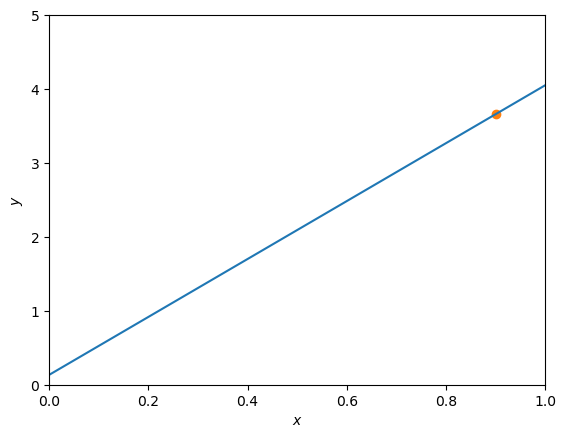

In [20]:
plt.plot(x_new, y_hat_new_sk, "C0-")
plt.scatter(x_new_2,y_hat_new_2, color= "C1")
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

Vi kan også bruke modellen vår (enten den vi har bygget fra bunnen eller SciKit-Learn modellen

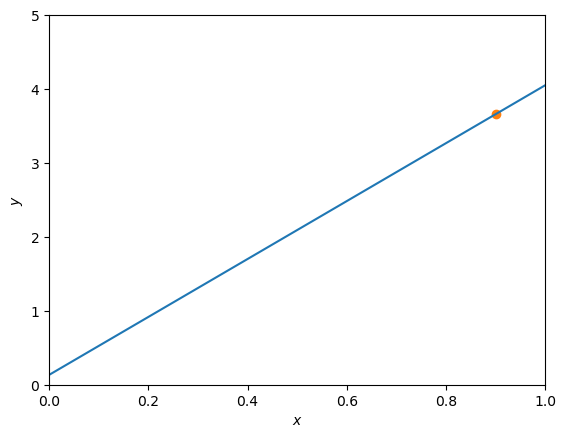

In [21]:
plt.plot(x_new, y_hat_new_sk, "C0-")
plt.scatter(x_new_2,linreg.predict(np.array([[x_new_2]])), color= "C1")
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()